In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\pricing-optimization-system\data\raw\pricing_data.csv")

# Elasticity estimated from 02_price_elasticity
price_elasticity = -0.264


In [3]:
baseline_price = df["price"].mean()
baseline_demand = df["quantity_sold"].mean()

baseline_price, baseline_demand

(np.float64(54.123089798812025), np.float64(1497.205209572677))

In [17]:
# Simulate Demand Across Price Range
price_range = np.linspace(
    baseline_price * 0.5,
    baseline_price * 1.5,
    50
)
simulated_demand = baseline_demand * (price_range / baseline_price) ** price_elasticity

In [10]:
#compute Revenue
revenue = price_range * simulated_demand

simulation_df = pd.DataFrame({
    "price": price_range,
    "predicted_demand": simulated_demand,
    "revenue": revenue
})

simulation_df.head()

,price,predicted_demand,revenue
0,27.061545,1797.849147,48652.575422
1,28.166098,1778.961245,50106.396333
2,29.270651,1760.987138,51545.239242
3,30.375203,1743.850554,52969.815366
4,31.479756,1727.484072,54380.777613


In [11]:
# Find optimal Price
optimal_row = simulation_df.loc[simulation_df["revenue"].idxmax()]

optimal_price = optimal_row["price"]
max_revenue = optimal_row["revenue"]

optimal_price, max_revenue

(np.float64(81.18463469821803), np.float64(109211.17458638435))

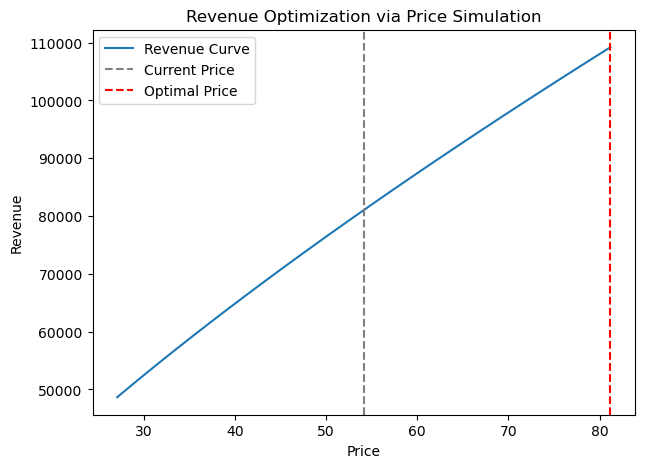

In [12]:
# Visualization
plt.figure(figsize=(7,5))
plt.plot(simulation_df["price"], simulation_df["revenue"], label="Revenue Curve")
plt.axvline(baseline_price, color="gray", linestyle="--", label="Current Price")
plt.axvline(optimal_price, color="red", linestyle="--", label="Optimal Price")
plt.xlabel("Price")
plt.ylabel("Revenue")
plt.title("Revenue Optimization via Price Simulation")
plt.legend()
plt.show()

Note: The optimal price occurs at the upper bound of the simulated range, indicating that revenue continues to increase within the tested prices. Demand is relatively inelastic, so increasing prices leads to higher revenue despite some loss in volume. Revenue optimization should focus on pricing strategy rather than increasing sales volume.
Real-world constraints (competition, churn, regulation) must cap price.

In [13]:
baseline_revenue = baseline_price * baseline_demand
revenue_uplift = (max_revenue - baseline_revenue) / baseline_revenue * 100

baseline_revenue, max_revenue, revenue_uplift

(np.float64(81033.37200495118),
 np.float64(109211.17458638435),
 np.float64(34.7730840815948))

### Business Summary

- The optimized price is higher than the current average price
- Revenue simulation indicates a positive revenue uplift from price optimization
- Inelastic demand supports strategic price increases
